In [1]:
from sklearn.datasets import fetch_20newsgroups_vectorized
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import random as rand
import numpy as np
import math
from matplotlib import colors
from sklearn.preprocessing import normalize
from sklearn.metrics import pairwise_distances, confusion_matrix, accuracy_score, silhouette_score
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics

# Problem 5
### DBSCAN on toy-neighborhood data

In [2]:
path = "C:/Users/chase/OneDrive/Northeastern Code/DS 5230/Hw 2b/dbscan.csv"
df = pd.read_csv(
    path, index_col = 1)
df['cluster'] = df['cluster']

In [3]:
df

,cluster,x,y,num_neighbors,neighbors
pt,,,,,
0,NaN,51.418089,13.593610,2,"0,27"
1,NaN,39.132318,-4.419204,3,"1,40,75"
2,NaN,47.807515,-25.822561,1,2
3,NaN,27.699703,53.434193,1,3
4,NaN,39.860995,5.676871,3,"4,56,75"
...,...,...,...,...,...
75,NaN,39.659047,0.230178,3,"1,4,75"
76,NaN,26.366491,8.798826,3,"21,49,76"
77,NaN,-36.184060,44.292045,2,"55,77"


In [4]:
def simple_dbscan(df, MinPts, include_self = True, include_colored_neighbors = False, pause = False, output = False):
    color = 0
    while df.index[df['cluster'].isnull().values].any(): #while there exist unvisited points
        queue = []
        color += 1
        if output:
            print(f"color: {color}")
        start = rand.choice(df.index[df['cluster'].isnull().values])
        queue.append(start) #int64
        
        while queue:
            if output:
                print(f"Current Queue: {queue}")
                print(f"Next Point: {queue[0]}")
            pt = queue.pop(0) #get next point
            
            df.at[pt, 'cluster'] = color #color point
            try:
                neighbors = df.iloc[pt].neighbors.split(",") #get point's neighbors
            except: 
                neighbors = df.iloc[pt].neighbors
            neighbors = [int(x) for x in neighbors]
                  
            if not include_self: #pops pt from neighbor list if not including self as a neighbor
                neighbors.remove(pt)
                
            if output:
                print(f"Point {pt}'s neighbors: {neighbors} ({len(neighbors)})")    
                
            if (len(neighbors)) < MinPts: #break if neighbors are fewer than MinPts
                if output:
                    print(f"Too few neighbors\n")
                df.at[pt, 'cluster'] = 0
                if pause: 
                    input()
                continue


                
            if pause:
                input()
            for neighbor in neighbors:
                neighbor_color = df.iloc[neighbor].cluster
                if not include_colored_neighbors and not math.isnan(neighbor_color):
                #exit if excluding colored neighbors and neighbor is colored
                    continue
                if neighbor in queue: #don't add neighbors which are already in queue
                    continue
                queue.append(neighbor)

In [5]:
simple_dbscan(df, 3, pause = False, output = False)

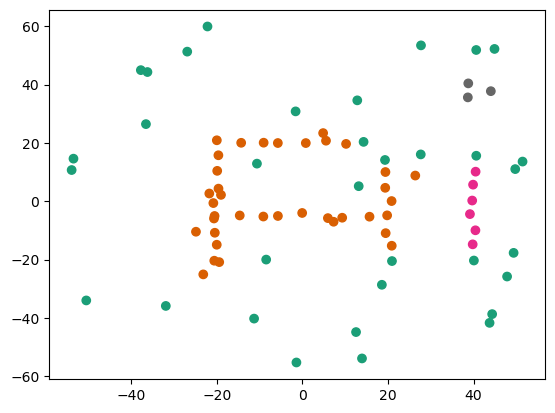

In [6]:
plt.scatter(x = df.x, y = df.y, c = df.cluster, cmap = "Dark2")

#'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'winter', 'winter_r'

In [7]:
df

,cluster,x,y,num_neighbors,neighbors
pt,,,,,
0,0.0,51.418089,13.593610,2,"0,27"
1,5.0,39.132318,-4.419204,3,"1,40,75"
2,0.0,47.807515,-25.822561,1,2
3,0.0,27.699703,53.434193,1,3
4,5.0,39.860995,5.676871,3,"4,56,75"
...,...,...,...,...,...
75,5.0,39.659047,0.230178,3,"1,4,75"
76,2.0,26.366491,8.798826,3,"21,49,76"
77,0.0,-36.184060,44.292045,2,"55,77"


# Problem 6
### DBSCAN on toy raw data

In [8]:
def load_raw_data(path, epsilon):
    df = pd.read_csv(path)
    df = df.rename(columns={df.columns[0]: "x", df.columns[1]: "y"})
    vector = df[['x', 'y']]
    dists = pd.DataFrame(pairwise_distances(vector, metric='euclidean'))
    dists = ~dists[dists<=epsilon].isnull()
    dists = dists.apply(lambda row: np.where(row)[0])
    df.insert(0, 'cluster', np.nan)
    df.insert(3, 'neighbors', list(dists))
    df.insert(3, 'num_neighbors', df['neighbors'].explode().reset_index().groupby('index').count()['neighbors'])
    return df

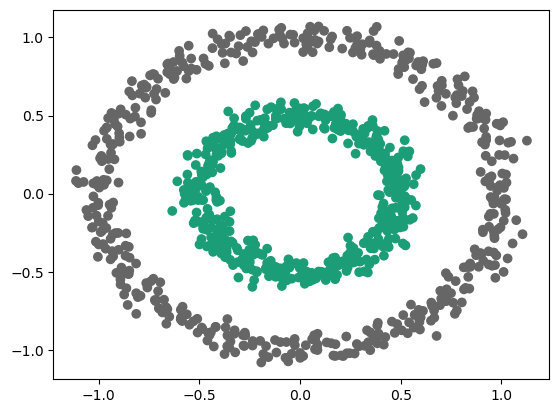

In [9]:
path = "C:/Users/chase/OneDrive/Northeastern Code/DS 5230/Hw 2B/circle.csv"
df = load_raw_data(path, .2)
df
simple_dbscan(df, 10, include_self = True, include_colored_neighbors = False)
plt.scatter(x = df.x, y = df.y, c = df.cluster, cmap = "Dark2")

#'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'winter', 'winter_r'

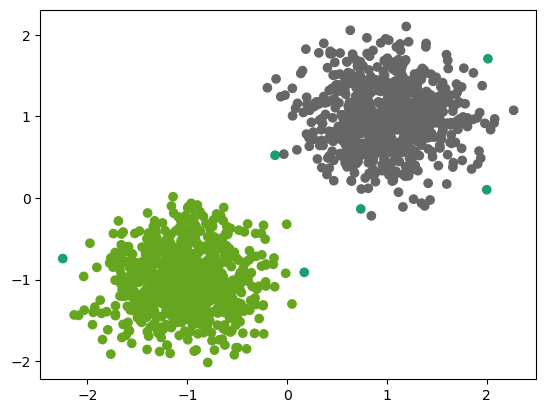

In [10]:
path = "C:/Users/chase/OneDrive/Northeastern Code/DS 5230/Hw 2B/blobs.csv"
df = load_raw_data(path, .35)
df
simple_dbscan(df, 5, include_self = True, include_colored_neighbors = False)
plt.scatter(x = df.x, y = df.y, c = df.cluster, cmap = "Dark2")

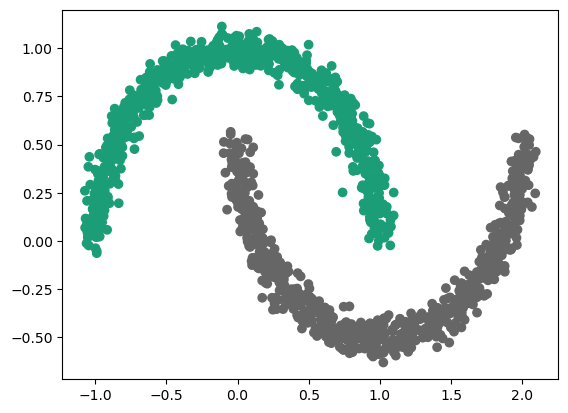

In [11]:
path = "C:/Users/chase/OneDrive/Northeastern Code/DS 5230/Hw 2B/moons.csv"
df = load_raw_data(path, .2)
df
simple_dbscan(df, 10, include_self = True, include_colored_neighbors = False)
plt.scatter(x = df.x, y = df.y, c = df.cluster, cmap = "Dark2")

# PROBLEM 7 
### DBSCAN on real data

In [12]:
def load_20ng(epsilon):
    X, y = fetch_20newsgroups_vectorized(subset='train', remove=('headers', 'footers', 'quotes'), return_X_y = True)
    X_test, y_test = fetch_20newsgroups_vectorized(subset='test', remove=('headers', 'footers', 'quotes'), return_X_y = True)
    
    dists = pd.DataFrame(pairwise_distances(X, metric = 'euclidean'))
    dists = ~dists[dists<=epsilon].isnull()
    dists = dists.apply(lambda row: np.where(row)[0])
    
    df = pd.DataFrame(data = dists)
    df = df.rename(columns={df.columns[0]: "neighbors"})
    df.insert(0, 'cluster', np.nan)
    df.insert(2, 'num_neighbors', df['neighbors'].explode().reset_index().groupby('index').count()['neighbors'])

    return df, y

In [13]:
def gini(df):
    df_groups = df.groupby('cluster').count().reset_index(drop=True).reset_index().rename(columns={'index': 'cluster'})
    df_groups = df_groups[df_groups.cluster != 0]
    df_groups.insert(3, 'gini', 1 - (df_groups['num_neighbors']/df.shape[0])**2)
    gini = df_groups['gini'].mean()
    return gini

In [14]:
def purity(df, y):
    df_groups = df[['cluster']].copy()
    df_groups.insert(1, 'y', y)
    df_groups = df_groups.groupby(['cluster'])['y'].agg(lambda x: pd.Series.mode(x).iat[0]).reset_index()
    df2 = pd.merge(df, df_groups, how = 'left')
    df2.insert(4, 'y2', y)
    df2 = df2.rename(columns = {'y': 'y_pred', 'y2': 'y_true'})
    df2['y_true'] = df2['y_true'].apply(str)
    df2['y_pred'] = df2['y_pred'].apply(str)
    conf = pd.DataFrame(confusion_matrix(df2['y_true'], df2['y_pred']))
    arr = conf.apply(max, axis = 1)
    purity = sum(arr)/df2.shape[0]
    
    return purity

In [15]:
df, y = load_20ng(.85)
simple_dbscan(df, 20, include_self = True, include_colored_neighbors = False)
print(f"gini: {gini(df)}")
print(f"purity: {purity(df, y)}")
#print(df)

gini: 0.959799063791994
purity: 0.7025808732543751


epsilon	minpts	gini	purity
0.85	5	0.987994259	0.666872901
0.9	    5	0.974849393	0.624359201
0.95	5	0.955147761	0.603411702
0.85	10	0.968879026	0.686494608
0.9	    10	0.947483902	0.633462966
0.95	10	0.939674548	0.60570974
1	    10	0.172662313	0.90958105
0.85	20	0.959799064	0.702580873
0.9	    20	0.929367694	0.642213187
0.95	20	0.891674449	0.609952272

Epsilon of .85 and Minpts of 20 give the best gini index and purity that I was able to find. I believe the relatively low scores are due to the very high dimensionality of the data, creating distance between points.

Above you can see the many attempted values and results that I had.

### Fashion MNIST Data

In [16]:
def load_fashion(epsilon):
    (X, y), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
    X, X_test, y, y_test = train_test_split(X, y, test_size = .5, random_state = 55) #used to subset data for runtime
    X = X.reshape(X.shape[0], X.shape[1] * X.shape[2])
    
    X = normalize(X)
    y = y.astype(np.int32)
    
    dists = pd.DataFrame(pairwise_distances(X, metric = 'euclidean'))
    dists = ~dists[dists<=epsilon].isnull()
    dists = dists.apply(lambda row: np.where(row)[0])
    
    df = pd.DataFrame(data = dists)
    df = df.rename(columns={df.columns[0]: "neighbors"})
    df.insert(0, 'cluster', np.nan)
    df.insert(2, 'num_neighbors', df['neighbors'].explode().reset_index().groupby('index').count()['neighbors'])
    #return X, y, X_test, y_test
    return df, y

In [17]:
df, y = load_fashion(.5)

In [18]:
simple_dbscan(df, 10)
print(gini(df))
print(purity(df, y))

0.32058446222222214
0.9018333333333334


In [19]:
df

,cluster,neighbors,num_neighbors
0,1.0,"[0, 34, 134, 528, 536, 596, 683, 756, 793, 969...",362
1,1.0,"[1, 3, 7, 8, 14, 19, 37, 44, 45, 46, 70, 77, 7...",3454
2,1.0,"[2, 29, 350, 828, 1284, 1375, 1414, 1465, 2444...",108
3,1.0,"[1, 3, 7, 14, 31, 70, 77, 95, 102, 110, 113, 1...",1278
4,1.0,"[4, 40, 57, 66, 73, 76, 96, 119, 160, 166, 179...",1669
...,...,...,...
29995,1.0,"[2, 29, 30, 54, 177, 196, 198, 350, 408, 430, ...",648
29996,0.0,[29996],1
29997,1.0,"[200, 385, 405, 540, 636, 915, 1035, 1084, 127...",131
29998,1.0,"[120, 343, 745, 932, 1866, 2124, 2991, 3254, 3...",88


In [20]:
df_groups = df[['cluster']].copy()
df_groups.insert(1, 'y', y)
df_groups = df_groups.groupby(['cluster'])['y'].count()

In [21]:
df_groups

cluster
0.0     5272
1.0    24728
Name: y, dtype: int64

In [22]:
df, y = load_fashion(.4)
simple_dbscan(df, 10)
print(gini(df)) 
print(purity(df, y))

0.8472988759259259
0.7744666666666666


Epsilon of .4 and MinPts of 10 gives the best gini index and purity I found at .847 and .774 respectively. I believe these relatively low scores, similarly to 20NG, are a result of the 'curse of dimensionality' creating large distances as a result of the many dimensions in the dataset.

Below shows all attempted epsilon and minpts combinations, with their respective gini index and purity values.

In [23]:
df, y = load_fashion(.45)
simple_dbscan(df, 10)
print(gini(df)) 
print(purity(df, y))

0.8055701088888889
0.8573666666666667


epsilon	minpts	gini	purity
0.2	    5	0.999919209	0.859433333
0.2	    10	0.999922477	0.9422
0.3	    10	0.981086158	0.711833333
0.35	5	0.964062775	0.731666667
0.35	10	0.927415949	0.720466667
0.35	20	0.909499753	0.699933333
0.35	50	0.975552395	0.715733333
0.4	    5	0.927931502	0.806633333
0.4	    10	0.847298876	0.774466667 # closest to assignment suggested value
0.4	    20	0.592743306	0.7444
0.4	    50	0.674833946	0.734466667
0.45	5	0.87549579	0.8739
0.45	10	0.805570109	0.857366667
0.45	20	0.819385596	0.831066667
0.45	50	0.52458975	0.786466667
0.5	    10	0.320584462	0.901833333 # lowest gini, highest purity

### Household Data

In [24]:
def load_household(epsilon):
    path = "C:/Users/chase/OneDrive/Northeastern Code/DS 5230/Hw 2B/household_power_consumption/household_power_consumption.txt"
    df = pd.read_csv(path, sep=';', low_memory=False)
    df = df.drop(columns=['Date', 'Time'])
    df = df.replace('?', np.nan)
    df = df.astype(float)
    df = df.fillna(df.mean())
    
    
    df_subset = df.sample(n=10000, random_state=42)
    df_0 = df_subset
    
    dists = pd.DataFrame(pairwise_distances(df_subset, metric='euclidean'))
    dists = ~dists[dists<=epsilon].isnull()
    dists = dists.apply(lambda row: np.where(row)[0])
    
    df = pd.DataFrame(data = dists)
    df = df.rename(columns={df.columns[0]: "neighbors"})
    df.insert(0, 'cluster', np.nan)
    df.insert(2, 'num_neighbors', df['neighbors'].explode().reset_index().groupby('index').count()['neighbors'])
    
    return df, df_0

df, df_0 = load_household(1.55)

In [25]:
simple_dbscan(df, 3)

In [26]:
#df

In [27]:
silhouette = silhouette_score(df_0, df['cluster'])

In [28]:
silhouette
#1, 5: -.42
#1,10: -.23
#1, 20: -.27
#.5, 5: -.36
#.5, 10: -.41
#.75, 5: -.37
#.3, 5: .54
#1.5, 5: .42
#1.5, 10: .33
#1.25, 5: 31
#1.75, 5: 38
#1.4, 5: .24
#1.6, 5: .38
#1.5, 3: .38
#1.55, 5: .45
#1.45, 5: .43
#1.55, 10: .33
#1.55, 3: .47

0.4721854341627033

# Problem 8
### Hierarchical Clustering

In [29]:
(X, y), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X = X.reshape(X.shape[0], -1)

In [30]:
clustering = AgglomerativeClustering(n_clusters=10)
labels = clustering.fit_predict(X)

In [31]:
y_pred = np.zeros_like(labels)
for i in range(10):
    mask = labels == i
    y_pred[mask] = np.bincount(y[mask]).argmax()
purity = accuracy_score(y, y_pred)
purity

0.7464833333333334

In [32]:
gini_index = 0
for i in range(10):
    mask = labels == i
    counts = np.bincount(y[mask])
    total = np.sum(counts)
    impurity = 1 - np.sum((counts / total) ** 2)
    gini_index += impurity * total / X.shape[0]
gini_index

0.33939958191510927